## TASK:
1. (40 points) In this assignment you will be working with an already implemented question
from Assignment 2 and try to see how over-fitting can be avoided using techniques
like k-fold cross validation, leave-one-out cross validation and regularisation. Problem:
We are given a dataset containing various criteria important to get admissions into
Master’s program and probablity of getting an admit. Dataset is available at http://preon.iiit.ac.in/~sanjoy_chowdhury/AdmissionDataset.zip You have already
implemented a model using linear regression to predict the probablity of getting the
admit.


    1. Implement Lasso regression also known as L1 regularisation and plot graph between
    regularisation coefficient λ and error (10 points)
    2. Implement Ridge regression also known as L2 regularisation and plot graph between
    regularisation coefficient λ and error (10 points)
    3. Analyse how the hyper-parameter λ plays a role in deciding between bias and variance.(5 points)
    4. Analyse how the two different regularisation techniques affect regression weights in
    terms of their values and what are the differences between the two.(5 points)
    5. In this part implement regression with k-fold cross validation. Analyse how behavior changes with different values 
    of k. Also implement a variant of this which is the leave-one-out cross validation. (10 points)


--------------------------------------------------------------------------------------------------------------------------

In [62]:
#loading and viewing the dataset
import pandas as pd
data = pd.read_csv("AdmissionDataset/data.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,242,317,103,2,2.5,2.0,8.15,0,0.65
1,334,319,108,3,3.0,3.5,8.54,1,0.71
2,4,322,110,3,3.5,2.5,8.67,1,0.80
3,45,326,113,5,4.5,4.0,9.40,1,0.91
4,232,319,106,3,3.5,2.5,8.33,1,0.74


In [63]:
# removing the serial number and taking separating the output label "Chance of Admit"
y_labels = data["Chance of Admit "]
data_cleaned = data.iloc[:,1:8]
print(data_cleaned.shape)
data_cleaned.head()

(450, 7)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,317,103,2,2.5,2.0,8.15,0
1,319,108,3,3.0,3.5,8.54,1
2,322,110,3,3.5,2.5,8.67,1
3,326,113,5,4.5,4.0,9.40,1
4,319,106,3,3.5,2.5,8.33,1


In [64]:
# standardization of the dataset
from sklearn.preprocessing import StandardScaler
data_norm = StandardScaler().fit_transform(data_cleaned)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [65]:
# spliting into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(data_norm, y_labels, test_size=0.3)

In [47]:
#Linear Regression With Regularizer

#mean square error
def calculate_mse(Y_test, Y_pred):
    return (0.5/Y_test.shape[0])*(np.sum((Y_test-Y_pred)**2))
import numpy as np


class LinearRegressor():
    def __init__(self,Lambda , Learn_rate, num_epochs = None, regularizer="L2"):
        self.Lambda = Lambda
        self.Learn_rate = Learn_rate
        self.num_epochs = num_epochs
        self.regularizer = regularizer
    
    def d_abs(self, x): #broken rule of derivative
        mask_1 = (x >= 0) * 1.0
        mask_2 = (x < 0) * -1.0
        return mask_1 + mask_2
    
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        np.random.seed(1)
        self.W = np.random.randn(self.X_train.shape[1]+1,)
        self.X_train=np.insert(self.X_train , [0], 1, axis=1)
        Y_pred = self.X_train.dot(self.W.T)
        if self.regularizer == "L2":
            #-----------if using L2 regularizer------------------
            
            
            loss = (0.5/X_train.shape[0])*(np.sum((Y_train-Y_pred)**2) + self.Lambda * self.W.T.dot(self.W))
            new_loss = float('inf')
            while(self.num_epochs == None and new_loss != loss):
                loss = new_loss
                #updating Weights with gradient descent:
                self.W = self.W - (self.Learn_rate/self.X_train.shape[0])*(np.dot(self.X_train.T, Y_pred - Y_train)\
                                                                       + self.Lambda * self.W)
                #new predictions:
                Y_pred = self.X_train.dot(self.W.T)
                #calculate new loss
                new_loss = (0.5/self.X_train.shape[0])* (np.sum((self.Y_train-Y_pred)**2)\
                                                     + self.Lambda*self.W.T.dot(self.W))
#                 print(new_loss)
            while(self.num_epochs != None and self.num_epochs>0):
                loss = new_loss
                #updating Weights with gradient descent:
                self.W = self.W - (self.Learn_rate/self.X_train.shape[0])*(np.dot(self.X_train.T, Y_pred - Y_train)\
                                                                       + self.Lambda * self.W)
                 #new predictions:
                Y_pred = self.X_train.dot(self.W.T)
                #calculate new loss:
                new_loss = (0.5/self.X_train.shape[0])* (np.sum((self.Y_train-Y_pred)**2)\
                                                     + self.Lambda*self.W.T.dot(self.W))
                self.num_epochs= self.num_epochs-1
        if self.regularizer == "L1":
            #------------using L1 regularizer--------------------
            
            loss = (0.5/X_train.shape[0])*(np.sum((Y_train-Y_pred)**2) + self.Lambda*np.sum(np.absolute(self.W)))
            new_loss = float('inf')
            while(self.num_epochs == None and new_loss != loss):
                loss = new_loss
                #updating Weights with gradient descent:
                self.W = self.W - (self.Learn_rate/self.X_train.shape[0])*(np.dot(self.X_train.T, Y_pred - Y_train)\
                                                                       + self.Lambda* self.d_abs(self.W))
                #new predictions:
                Y_pred = self.X_train.dot(self.W.T)
                #calculate new loss:
                new_loss = (0.5/self.X_train.shape[0])* (np.sum((self.Y_train-Y_pred)**2)\
                                                      + self.Lambda*np.sum(np.absolute(self.W)))
                
            while(self.num_epochs != None and self.num_epochs>0):
                loss = new_loss
                #updating Weights with gradient descent
                self.W = self.W - (self.Learn_rate/self.X_train.shape[0])*(np.dot(self.X_train.T, Y_pred - Y_train)\
                                                                       + self.Lambda* self.d_abs(self.W))
                #new predictions:
                Y_pred = self.X_train.dot(self.W.T)
                new_loss = (0.5/self.X_train.shape[0])* (np.sum((self.Y_train-Y_pred)**2)\
                                                     + self.Lambda*np.sum(np.absolute(self.W)))
                self.num_epochs= self.num_epochs-1
                
#predicting output
    def predict(self, X_test):
        X_test = np.insert(X_test, [0], 1, axis=1)
        Y_pred = np.round(X_test.dot(self.W.T),2)
        return Y_pred

##### Task 1 and 2 :-

In [119]:
#train with L2 regularizer
ld = 1
LR = LinearRegressor(ld, 0.1, regularizer="L2")
%time LR.fit(X_train, Y_train)

Wall time: 416 ms


In [120]:
#predict on unseen data
%time y_pred = LR.predict(X_test)

Wall time: 0 ns


In [121]:
print("                         Original Output          predicted output   ")
for i in range(30,40):
    print()
    print("test_data_point:",i,"         ",Y_test.iloc[i],"               ", y_pred[i])

                         Original Output          predicted output   

test_data_point: 30           0.73                 0.72

test_data_point: 31           0.78                 0.78

test_data_point: 32           0.57                 0.52

test_data_point: 33           0.81                 0.81

test_data_point: 34           0.89                 0.88

test_data_point: 35           0.38                 0.53

test_data_point: 36           0.72                 0.73

test_data_point: 37           0.76                 0.81

test_data_point: 38           0.92                 0.92

test_data_point: 39           0.65                 0.66


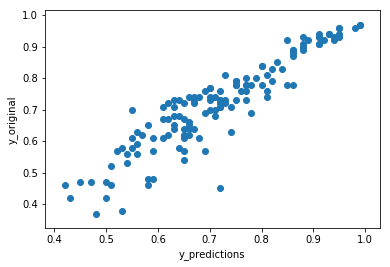

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_pred, Y_test)
plt.xlabel("y_predictions")
plt.ylabel("y_original")
plt.show()

As seen from the plot the y_pred and y_test values are aligned at a 45 degree line,  which means the model works decently

In [123]:
print("mse: %.20f" %calculate_mse(Y_test, y_pred))

mse: 0.00158555555555555533


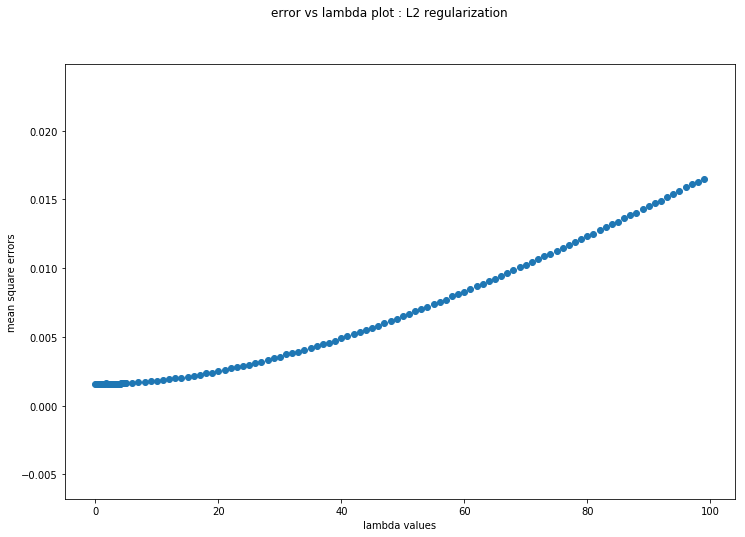

In [124]:
lambdas = []
mse=[]
import decimal
for ld in np.arange(0,5, 0.2):
    LR_test = LinearRegressor(ld, 0.1)
    LR_test.fit(X_train, Y_train)
    pred = LR_test.predict(X_test)
    mse.append(calculate_mse(Y_test,pred))
    lambdas.append(ld)
for ld in np.arange(2,100,1):
    LR_test = LinearRegressor(ld, 0.1)
    LR_test.fit(X_train, Y_train)
    pred = LR_test.predict(X_test)
    mse.append(calculate_mse(Y_test,pred))
    lambdas.append(ld)
    
    
import matplotlib.pyplot as plt


fig=plt.figure(figsize=(12,8))
fig.suptitle("error vs lambda plot : L2 regularization")
plt.xlabel("lambda values")
plt.ylabel("mean square errors")

plt.scatter(lambdas,mse)

plt.show()

From the plot we can see the following things:
1. As the values of lambda is increasing the mean square error seemed to be increasing too
2. If we increase lambda the model will reduce variance which means it is underfitting for high values of lambda
3. Lambda turns out to be the hyperparameter of the Linear Regression model


### Using Lasso Regularization : L1

In [125]:
#train on L1 regularizer
LR_L1 = LinearRegressor(1, 0.1,num_epochs=500, regularizer="L1")
LR_L1.fit(X_train, Y_train)
Y_pred_L1 = LR_L1.predict(X_test)

In [126]:
print("mse : %.8f"%calculate_mse(Y_test, Y_pred_L1))

mse : 0.00159519


In [127]:
#printing first 10 test point and see how our model works:
print("                         Original Output          predicted output   ")
for i in range(10):
    print()
    print("test_data_point:",i,"         ",Y_test.iloc[i],"               ", Y_pred_L1[i])

                         Original Output          predicted output   

test_data_point: 0           0.57                 0.69

test_data_point: 1           0.68                 0.7

test_data_point: 2           0.61                 0.61

test_data_point: 3           0.68                 0.64

test_data_point: 4           0.71                 0.61

test_data_point: 5           0.79                 0.75

test_data_point: 6           0.67                 0.65

test_data_point: 7           0.73                 0.74

test_data_point: 8           0.61                 0.59

test_data_point: 9           0.71                 0.72


As seen above the model works quite well as the predicted value is very very close to the original value

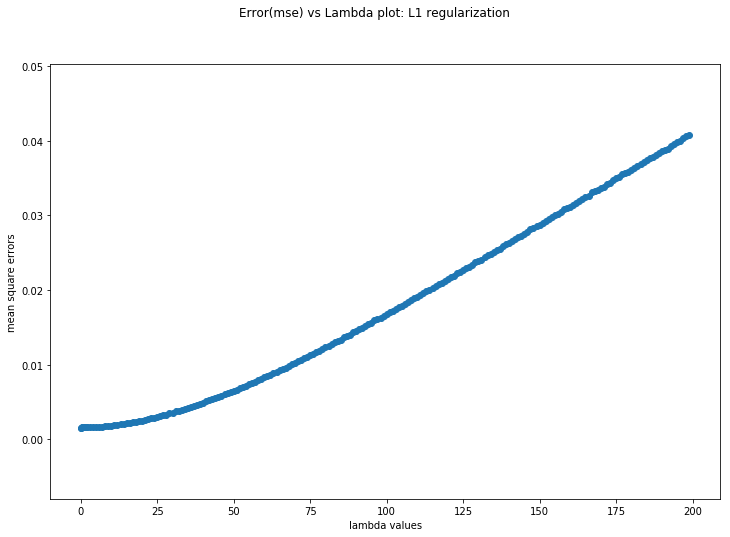

In [128]:
#lasso regularizer error vs lambda values
lambdas = []
mse=[]
import decimal
for ld in np.arange(0,2, 0.2):
    LR_test = LinearRegressor(ld, 0.1, num_epochs=400, regularizer="L1")
    LR_test.fit(X_train, Y_train)
    pred = LR_test.predict(X_test)
    mse.append(calculate_mse(Y_test,pred))
    lambdas.append(ld)
for ld in np.arange(2,200,1):
    LR_test = LinearRegressor(ld, 0.1, num_epochs=400)
    LR_test.fit(X_train, Y_train)
    pred = LR_test.predict(X_test)
    mse.append(calculate_mse(Y_test,pred))
    lambdas.append(ld)
    
    
import matplotlib.pyplot as plt


fig=plt.figure(figsize=(12,8))
fig.suptitle("Error(mse) vs Lambda plot: L1 regularization")
plt.xlabel("lambda values")
plt.ylabel("mean square errors")

plt.scatter(lambdas,mse)

plt.show()

From the above plot we can see that the error is increasing with values of lambda. We see similar observaton even with L2 regularization

            3. How hyperparamter lambda plays a role Between Bias and Variance

In [90]:
import matplotlib.pyplot as plt
i = 0
mse_test=[]
mse_train=[]
lambdas=[]
while(i<25):
    LR_testing = LinearRegressor(i, 0.1)
    LR_testing.fit(X_train, Y_train)
    pred_test = LR_testing.predict(X_test)
    mse_test.append(calculate_mse(Y_test,pred_test))
    pred_train = LR_testing.predict(X_train[0:150])
    mse_train.append(calculate_mse(Y_train[0:150], pred_train))
    lambdas.append(i)
    if i==0:
        i=i+0.000000001
        continue
    if i < 1:
        i=i*1.5
    else:
        i = i+2



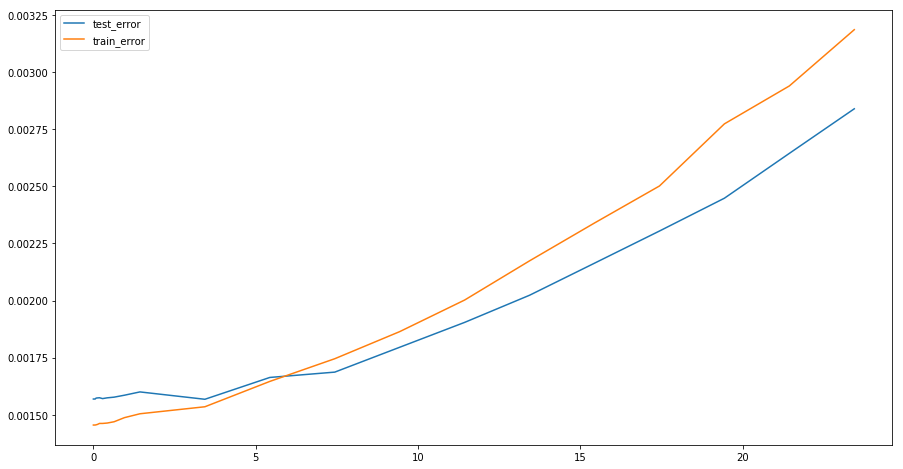

In [91]:
import matplotlib.pyplot as plt
% matplotlib inline
fig = plt.figure(figsize=(15,8))
plt.plot(lambdas, mse_test)
plt.plot(lambdas, mse_train)
plt.legend(('test_error','train_error'))
plt.show()

When Lambda=0:

     Train error was very low and test error was high. So this was a high variance model
When lambda increases, 
1. the train error start increasing and suddenly at one point test error gives in minima. and the difference between train and test error is very less. That point is where the bias and variance both are low. 
2. When lambda value increases more the train error seemed to be increasing as the model will highly underfit. So this is where we can see regularization introduces BIAS into the model.


## 4. How lamba affects the weights in case of L1 and L2 regularization

####                                        Change of weights w.r.t lambda values for L2 regularization

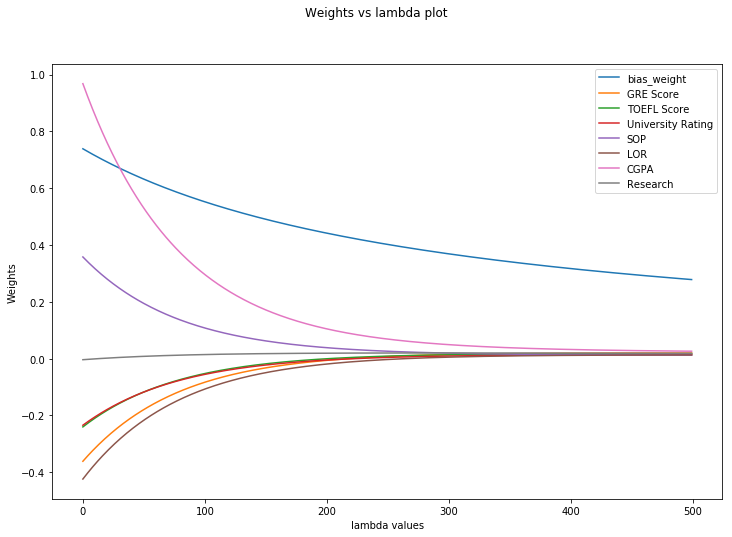

In [46]:
#plotting graph changing of lambda values
lambdas = []
Weights=[]
import decimal
for ld in np.arange(0,500,1):
    LR_test = LinearRegressor(ld, 0.01, num_epochs=400)
    LR_test.fit(X_train, Y_train)
    pred = LR_test.predict(X_test)
    Weights.append(LR_test.W)
    lambdas.append(ld)
    
    
import matplotlib.pyplot as plt


fig=plt.figure(figsize=(12,8))
fig.suptitle("Weights vs lambda plot")
plt.xlabel("lambda values")
plt.ylabel("Weights")

for j in range(len(Weights[0])):
    arr=[]
    for i in range(len(Weights)):
        arr.append(Weights[i][j])
    plt.plot(lambdas,arr)

plt.legend(('bias_weight','GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research'))
plt.show()


The above plot represents some interesting points:
1. As the value of Lambda increases the the weights seemed to be decreasing
2. If the Weights decreases that means the model reduces its variance.
3. We can prove that our weights decreases when the value of lambda is large
4. We can see that the weights are decreasing slowly in case of L2 regularizer, we will see about L1 regularizer too


####    Change of weights w.r.t lambda values for L1(Lasso) regularization

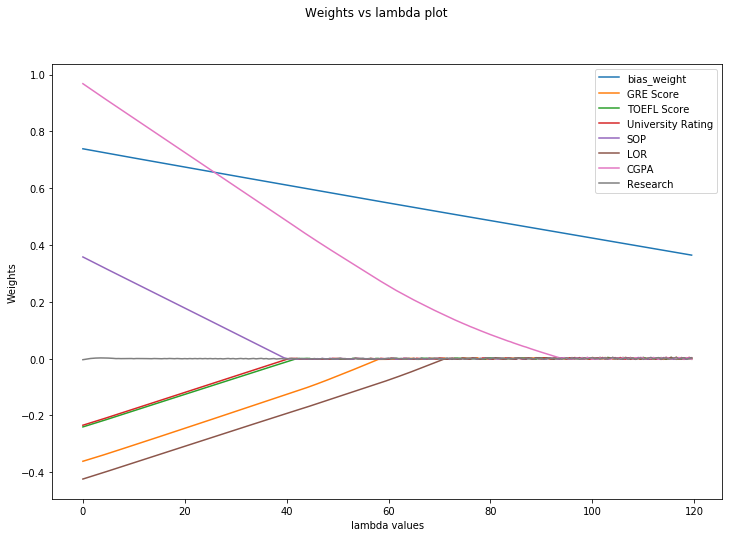

In [45]:
#plotting graph changing of lambda values
lambdas = []
Weights=[]
import decimal
for ld in np.arange(0,120,0.5):
    LR_test = LinearRegressor(ld, 0.01, num_epochs=400, regularizer="L1")
    LR_test.fit(X_train, Y_train)
    pred = LR_test.predict(X_test)
    Weights.append(LR_test.W)
    lambdas.append(ld)
    
    
import matplotlib.pyplot as plt


fig=plt.figure(figsize=(12,8))
fig.suptitle("Weights vs lambda plot")
plt.xlabel("lambda values")
plt.ylabel("Weights")

for j in range(len(Weights[0])):
    arr=[]
    for i in range(len(Weights)):
        arr.append(Weights[i][j])
    plt.plot(lambdas,arr)

plt.legend(('bias_weight','GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research'))
plt.show()


The above plot clearly shows that as we increase our lambda the weights are getting close to zero, but in L2 regularization the weights were decreasing slowly, here the weights are decreasing very fast. Thats the reason L1 regularizer creates sparsity.

> Feature Selection is automatic in L1 regularization
The features in decreasing order of importances are:
1. CGPA
2. LOR
3. GRE_SCORE
4. TOEFL
5. University rating
6. SOP
7. RESEARCH

So we can conclude that the most important feature is CGPA in predicting the chance of admit

###### NOTE:
We have reduced the Learning rate to 0.01 because we want to decrease the weights slowly. If the learning rate was high, the weights will be decreased very fast and it will harder to interpret the plot. Just to contrast efficiently the effect of lambdas we have reduced the learning rate.


##### DIfference L1 and L2:-
> L1 and L2 both reduces the weights, but we can see at lambda=100, L1 regularizer makes all the weights very very close to zero. In case of L2 the weights are getting close to zero but at a slow rate
> L1 creates sparsity as the weights can become zero as lambda increases. L2 does not creates sparsity as the weights gets to zero very very slowly
> L1 regularizer is not differentiabe, L2 regularizer is differentiable, so gradient can be calculated easily
> Both L2 and L1 regularization introduces bias to the system and thus helps in reducing variance.

## 5. K-FOLD cross validation on regression

In [18]:
import numpy as np
class K_Fold_CV():
    def __init__(self, num_splits=5):
        self.num_splits = num_splits
        if self.num_splits < 2 : 
            raise ValueError("Number of splits cannot be less than 2!")
            
    def split(self, X, Y):
        size = X.shape[0]
        steps = int(size/self.num_splits)
        ret_list=[]
        for i in range(0,size,steps):
            j=i+steps
            test_data = X[i:j,:]
            Y=np.array(Y)
            test_labels = Y[i:j]
            train_data=X[j:,:]
            train_data = np.vstack([train_data, X[0:i,:]])
            train_labels = Y[j:]
            train_labels = np.append(train_labels, Y[0:i])
            ret_list.append((train_data,test_data, train_labels, test_labels))
        return ret_list
            

In [20]:
kf = K_Fold_CV(num_splits=5)
for X_train,X_test,Y_train,Y_test in kf.split(data_norm, y_labels):
    LR_kfold = LinearRegressor(1,0.1)
    LR_kfold.fit(X_train,Y_train)
    pred = LR_kfold.predict(X_test)
    print("mse: ",calculate_mse(Y_test, pred))
    

mse:  0.0019966666666666666
mse:  0.0017500000000000007
mse:  0.001755
mse:  0.001603888888888889
mse:  0.0022983333333333332


In [35]:
#plotting error with repect to values of k in k-fold
average_errors = []
val_k=[]
for k in range(2,90):
    kf = K_Fold_CV(num_splits=k)
    mses = []
    for X_train,X_test,Y_train,Y_test in kf.split(data_norm, y_labels):
        LR_kfold = LinearRegressor(1,0.1)
        LR_kfold.fit(X_train,Y_train)
        pred = LR_kfold.predict(X_test)
        mses.append(calculate_mse(Y_test, pred))
    average_errors.append(sum(mses)/len(mses))
    val_k.append(k)

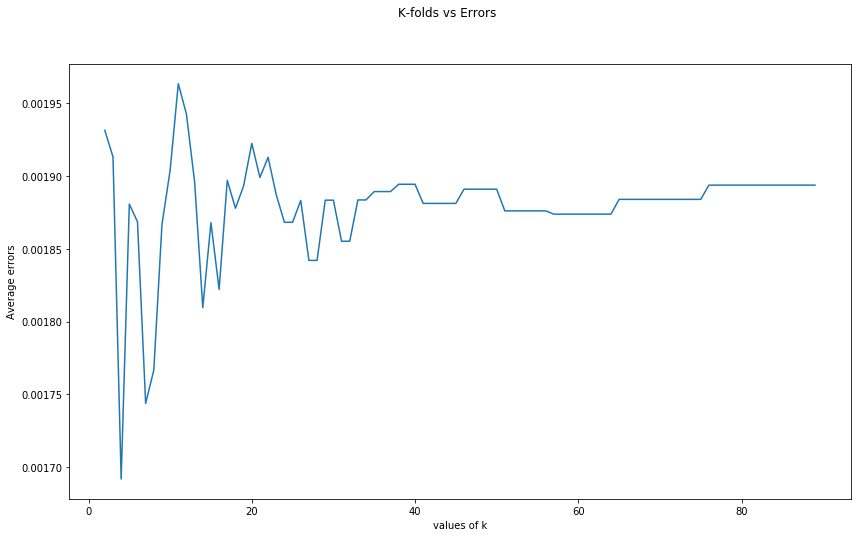

In [36]:
import matplotlib.pyplot as plt
% matplotlib inline
fig = plt.figure(figsize=(14,8))
fig.suptitle("K-folds vs Errors")
plt.xlabel("values of k")
plt.ylabel("Average errors")
plt.plot(val_k, average_errors)
plt.show()

From the above plot we can see that at a particular value of k, the model performs the best.

In [38]:
#lets see for what value of k the error is minimum
ind = average_errors.index(min(average_errors))
print("value of k where the error is minimum is: ", val_k[2])

value of k where the error is minimum is:  4


##### NOTE: If the value of k in k-fold cross validation is datasize-1 then it will perform the "leave one out" cross validation

In [42]:
#Performing leave one out cross-validation
errors = []
Leave_one_out_cv = K_Fold_CV(num_splits=data_norm.shape[0]-1)
for X_train_loo, X_test_loo, Y_train_loo, Y_test_loo in Leave_one_out_cv.split(data_norm, y_labels):
    Regr = LinearRegressor(1, 0.1)
    Regr.fit(X_train_loo,Y_train_loo)
    pred = Regr.predict(X_test_loo)
    errors.append(calculate_mse(Y_test_loo,pred))
print("average error:", sum(errors)/len(errors))

average error: 0.0018944444444444395


Leave one out cross validation performs moderately well

###  Finding out the best hyperparameter for this problem

In [131]:
import matplotlib.pyplot as plt
lambda_val = 0
mse_test=[]
mse_train=[]
lambdas=[]
while(lambda_val<10):
    LR_testing = LinearRegressor(lambda_val, 0.1)
    LR_testing.fit(X_train, Y_train)
    pred_test = LR_testing.predict(X_test)
    mse_test.append(calculate_mse(Y_test,pred_test))
    pred_train = LR_testing.predict(X_train[0:150])
    mse_train.append(calculate_mse(Y_train[0:150], pred_train))
    lambdas.append(lambda_val)
    if lambda_val==0:
        lambda_val=lambda_val+0.000000001
        continue
    if lambda_val < 1:
        lambda_val=lambda_val*1.2
    else:
        lambda_val = lambda_val+0.5
        


In [132]:
index = mse_test.index(min(mse_test))
print("best hyperparameter lambda for this problem is :" , lambdas[index])

best hyperparameter lambda for this problem is : 3.5633152668535137


In [134]:
best_lamda = 3.5633152668535137
LR = LinearRegressor(best_lamda , 0.1)
LR.fit(X_train,Y_train)
pred = LR.predict(X_test)
print(calculate_mse(Y_test, pred))

0.0015659259259259255


We can see that this is the least mean square error we have seen till now.

                                                                                -Souparna Das
                                                                                IIIT Hyderabad